## Exercise 1

#### "Make a program that computes the first derivative using these two expressions as function of various step lengths h and let h→0. Plot the results for x=0.1"

#### First with the forward difference

In [1]:
import numpy as np

In [8]:
def f(x):
    #return x*(x-1.)
    return x**3.

def df_forward(x,h):
    return (f(x+h) - f(x))/h

#to find the exact value -> use the power rule of derivatives on f(x)
#power rule: x^n -> nx^n-1

def df_exact(x):
    #return 2.*x-1.
    return (3.)*(x)**(3.-1.)

x0 = 0.1

all_h = []
all_df = []
all_err = []

#trying different step sizes approaching 0 
for i in range(0,-20,-1):
    h = 10**i
    df = df_forward(x0,h)
    df_err = abs(df_forward(x0,h) - df_exact(x0)) / df_exact(x0)
    all_h.append(h)
    all_df.append(df)
    all_err.append(df_err)
    print("{:<10} {:<20} {:<20}".format(h,df, df_err))

1          1.3300000000000005   43.33333333333334   
0.1        0.07000000000000002  1.3333333333333335  
0.01       0.03309999999999997  0.10333333333333211 
0.001      0.03030099999999994  0.010033333333331108
0.0001     0.03003001000000116  0.0010003333333718591
1e-05      0.030003000099990126 0.00010000333300399601
1e-06      0.030000300000948207 1.0000031606717991e-05
1e-07      0.030000029999262268 9.999754087275379e-07
1e-08      0.03000000298094413  9.936480411624572e-08
1e-09      0.03000000031380678  1.0460225856786147e-08
1e-10      0.02999999771172157  7.627594782640596e-08
1e-11      0.03000000421693461  1.4056448678634312e-07
1e-12      0.030000090953108405 3.031770279965373e-06
1e-13      0.029999874112673908 4.196244203271322e-06
1e-14      0.030010716134398763 0.0003572044799585634
1e-15      0.02992397996059992  0.0025340013133362304
1e-16      0.028189256484623115 0.060358117179229676
1e-17      0.04336808689942018  0.445602896647339   
1e-18      0.0                

#### Then with the central difference

In [3]:
def df_central(x,h):
    return (f(x+h) - f(x-h))/(2*h)

all_h_cen = []
all_df_cen = []
all_err_cen = []

for i in range(0,-20,-1):
    h = 10**i
    df = df_central(x0,h)
    df_err = abs(df_central(x0,h) - df_exact(x0)) / df_exact(x0)
    all_h_cen.append(h)
    all_df_cen.append(df)
    all_err_cen.append(df_err)
    print("{:<10} {:<20} {:<20}".format(h,df,df_err))

#df_exact at x=0.1, for reference
print(df_exact(x0))

1          1.0300000000000002   10.444444444444443  
0.1        0.04000000000000001  0.5555555555555556  
0.01       0.030099999999999984 0.6655555555555558  
0.001      0.030001000000000038 0.6666555555555552  
0.0001     0.030000010000001773 0.666666555555536   
1e-05      0.03000000009999127  0.6666666655556527  
1e-06      0.030000000001014458 0.666666666655395   
1e-07      0.030000000000472357 0.6666666666614184  
1e-08      0.029999999988546133 0.6666666667939319  
1e-09      0.02999999998854613  0.6666666667939319  
1e-10      0.029999998795923744 0.6666666800452918  
1e-11      0.03000000421693461  0.6666666198118378  
1e-12      0.030000199373325653 0.6666644514074929  
1e-13      0.030000958314846393 0.6666560187239291  
1e-14      0.030021558156123618 0.6664271315986265  
1e-15      0.03003240017784847  0.6663066646905726  
1e-16      0.02927345865710862  0.6747393482543488  
1e-17      0.04336808689942018  0.5181323677842203  
1e-18      0.0                  1.0           

## Exercise 2

#### 



In [4]:
import matplotlib.pyplot as plt

[[ 4.00000000e+12  4.00000000e+12  3.99999998e+12 ...  4.92617116e+12
   4.92622927e+12  4.92628738e+12]
 [ 0.00000000e+00  1.57680000e+07  3.15360000e+07 ... -2.26433213e+11
  -2.26423078e+11 -2.26412943e+11]]
1576800000.0


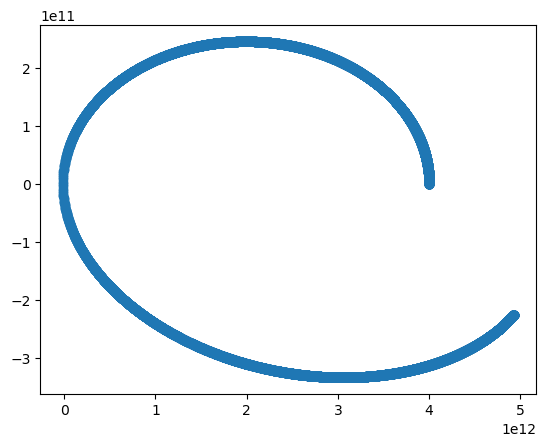

In [14]:
def ode_rk4_step(f, x, t, h):
    k1 = h * f(x,t)
    k2 = h * f(x + k1/2., t + h/2.)
    k3 = h * f(x + k1/2., t + h/2.)
    k4 = h * f(x + k3, t + h)
    return x + (k1 + 2. * k2 + 2. * k3 + k4) / 6.

def ode_rk4_multi(f, x0, t0, h, nsteps):
    t = np.zeros(nsteps + 1)
    x = np.zeros((len(t), len(x0)))
    t[0] = t0
    x[0] = x0
    for i in range(0, nsteps):
        t[i+1] = t[i] + h
        x[i+1] = ode_rk4_step(f, x[i], t[i], h)
    return t,x

G = 6.67430e-11
M = 1.9885e30

def fcomet(xin, t):
    x = xin[0]
    y = xin[1]
    vx = xin[2]
    vy = xin[3]
    return np.array([vx, vy, -G*M*(x/(x**2+y**2)**(3/2)), -G*M*(y/(x**2+y**2)**(3/2))])

x0 = [4e12,0.,0.,500.]
a = 0
b = 50. * 365. *24. * 60. * 60.
N = 50000
h = (b-a)/N

sol = ode_rk4_multi(fcomet, x0, a, h, N)
tpoints = sol[0]
xpoints = sol[1][:,0]
ypoints = sol[1][:,1]

x_y = np.array([xpoints, ypoints])
print(x_y)
plt.scatter(xpoints, ypoints)
print(b)
